
# Fitness Trackers Model : Using Supervised Regression



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Jaden2802/Fitness-Tracker-Using-Supervised-Regression/refs/heads/main/Fitness_trackers_updated.csv')

# Display the first few rows
data.head()

# Data Exploration

In [ ]:
# Get basic information about the dataset
data.info()

# Summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      610 non-null    object 
 1   Device Type                     610 non-null    object 
 2   Model Name                      610 non-null    object 
 3   Color                           610 non-null    object 
 4   Selling Price                   610 non-null    object 
 5   Original Price                  610 non-null    object 
 6   Display                         610 non-null    object 
 7   Rating (Out of 5)               554 non-null    float64
 8   Strap Material                  610 non-null    object 
 9   Average Battery Life (in days)  610 non-null    int64  
 10  Reviews                         114 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 52.6+ KB


,Rating (Out of 5),Average Battery Life (in days)
count,554.000000,610.000000
mean,4.195668,8.926230
std,0.422576,7.632107
min,2.000000,1.000000
25%,4.000000,2.000000
50%,4.200000,7.000000
75%,4.500000,14.000000
max,5.000000,45.000000


#  Data Cleaning

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Convert price columns to numeric
data["Selling Price"] = data["Selling Price"].str.replace(",", "").astype(float)
data["Original Price"] = data["Original Price"].str.replace(",", "").astype(float)
#data["Brand Name"] = data["Brand Name"].str.replace(",", "").astype(float)
# data["Model Name"] = data["Model Name"].str.replace(",", "").astype(float)
# data["Device Type"] = data["Device Type"].str.replace(",", "").astype(float)
# data["Display"] = data["Display"].str.replace(",", "").astype(float)
# data["Strap Material"] = data["Strap Material"].str.replace(",", "").astype(float)


# Fill missing values only for numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Display updated dataset info
print(data.info())


Brand Name                          0
Device Type                         0
Model Name                          0
Color                               0
Selling Price                       0
Original Price                      0
Display                             0
Rating (Out of 5)                  56
Strap Material                      0
Average Battery Life (in days)      0
Reviews                           496
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, 0 to 609
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      606 non-null    object 
 1   Device Type                     606 non-null    object 
 2   Model Name                      606 non-null    object 
 3   Color                           606 non-null    object 
 4   Selling Price                   606 non-null    float64
 5   Original Price                  606 n

In [ ]:
# Drop the 'Reviews' and 'Rating (Out of 5)' columns
data.drop(columns=["Reviews", "Rating (Out of 5)"], inplace=True)

# Verify changes
data.head()


,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Strap Material,Average Battery Life (in days)
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499.0,2999.0,AMOLED Display,Thermoplastic polyurethane,14
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099.0,2499.0,AMOLED Display,Thermoplastic polyurethane,14
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722.0,2099.0,LCD Display,Leather,14
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469.0,2999.0,AMOLED Display,Thermoplastic polyurethane,14
4,Xiaomi,FitnessBand,Band 3,Black,1799.0,2199.0,OLED Display,Plastic,7


In [ ]:
# Save the cleaned file as CSV
cleaned_file_path = "/content/Cleaned_Fitness_Trackers.xlsx"
data.to_excel(cleaned_file_path, index=False)

# Download the file to your local device
from google.colab import files
files.download(cleaned_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploratory Data Analysis (EDA)**

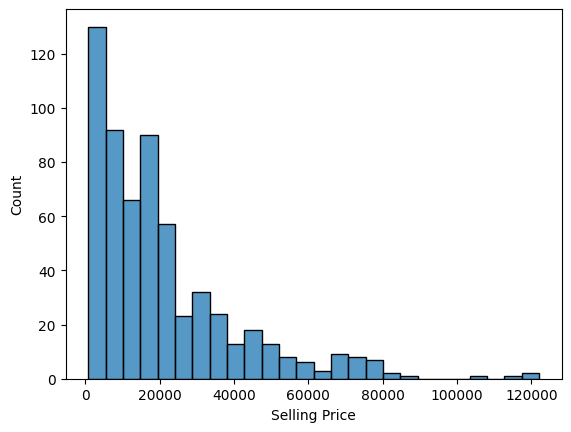

<Axes: xlabel='Device Type', ylabel='count'>

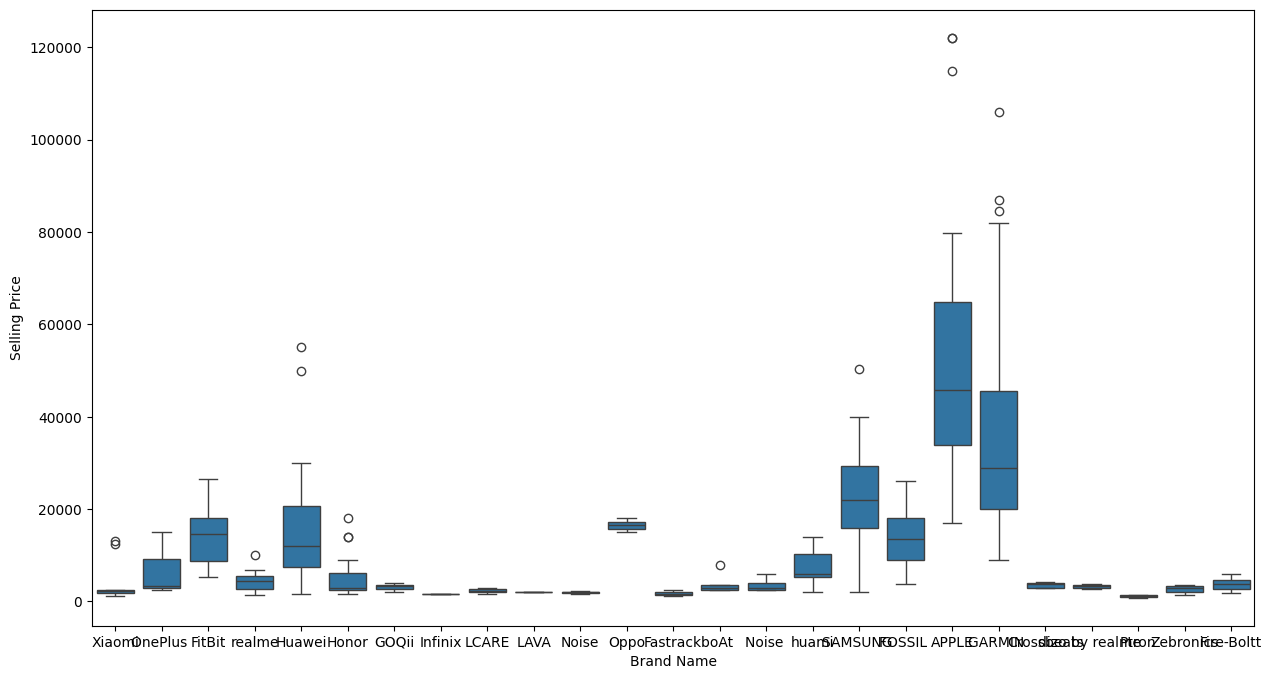

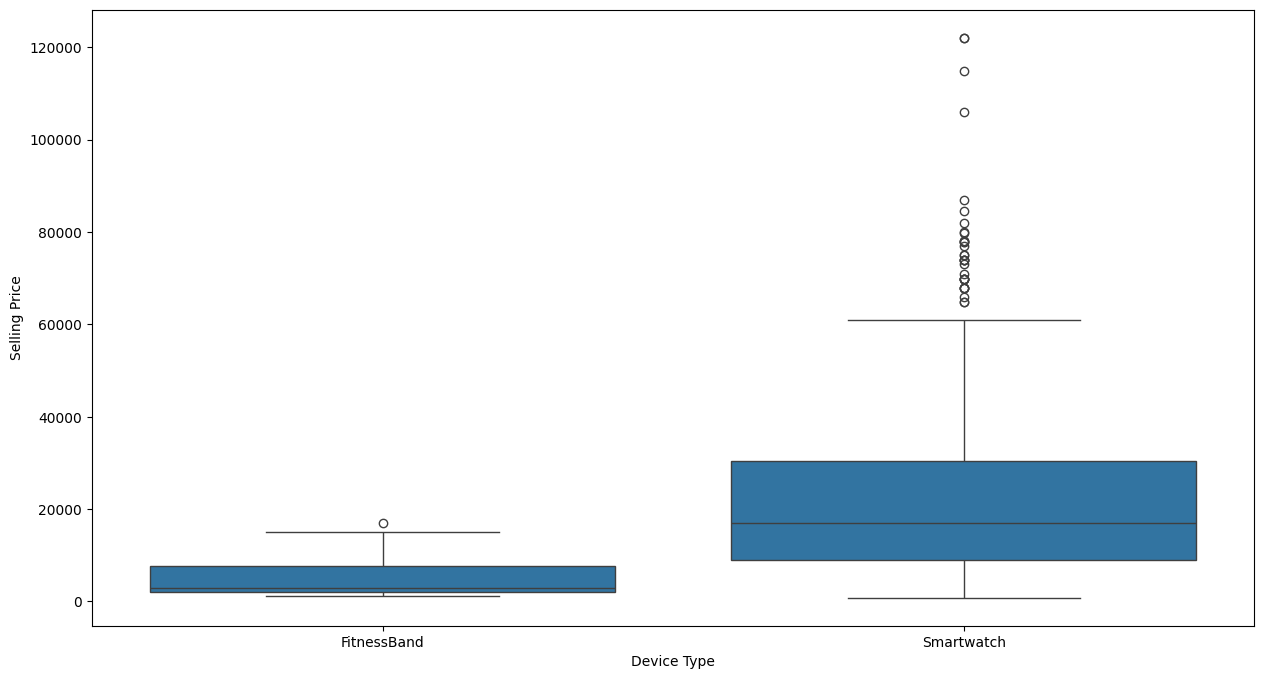

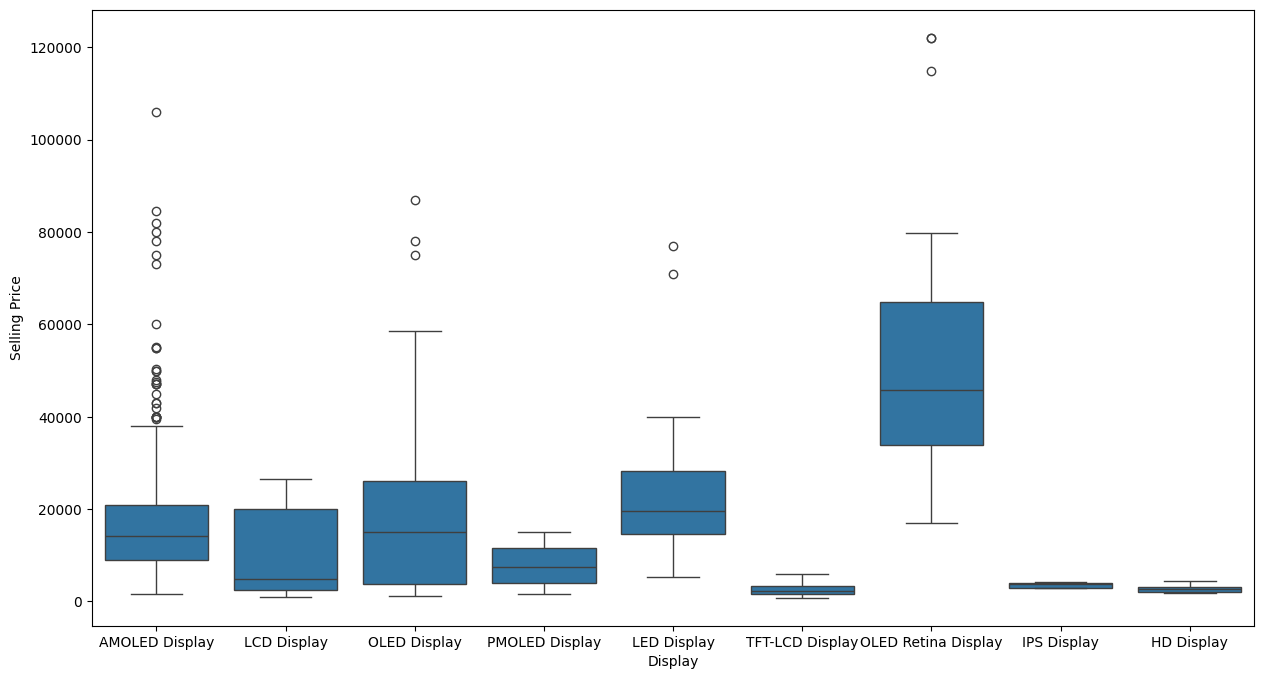

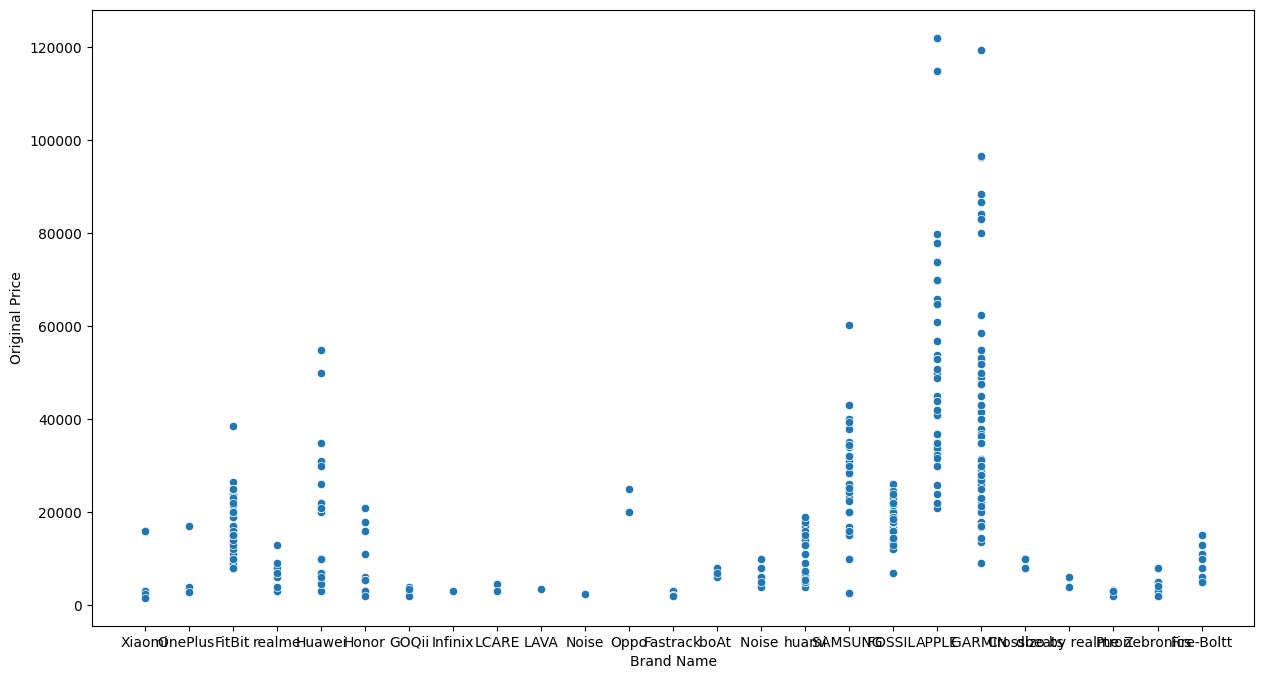

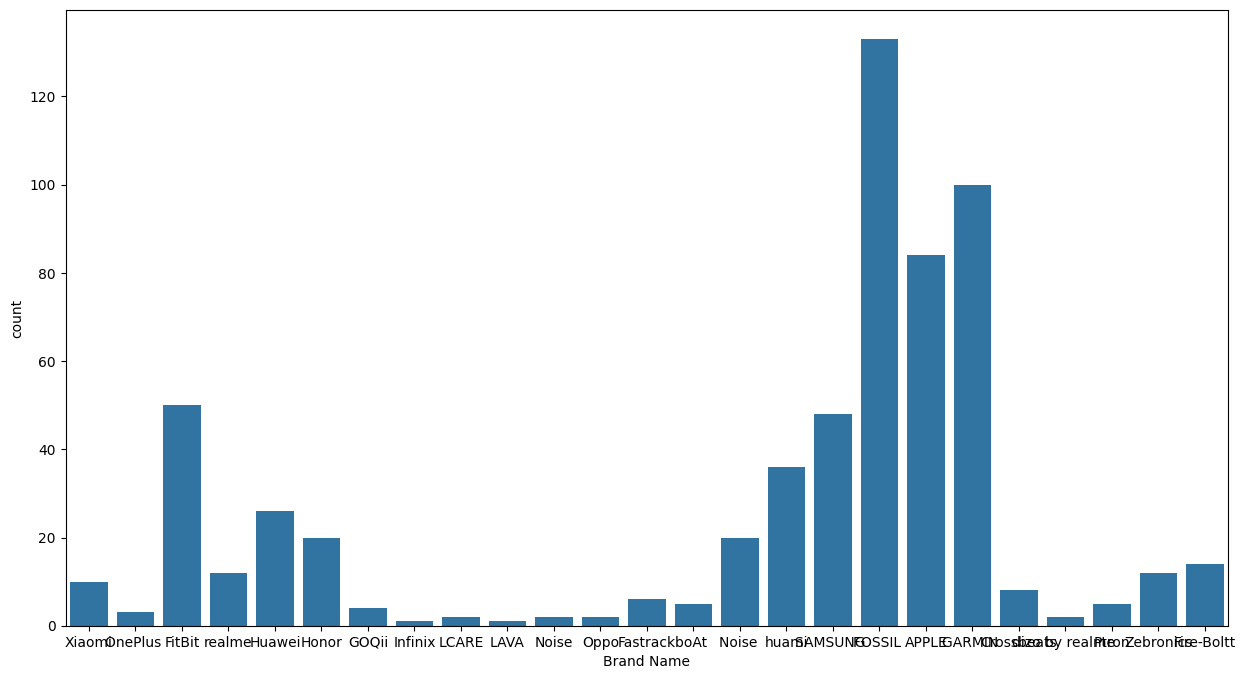

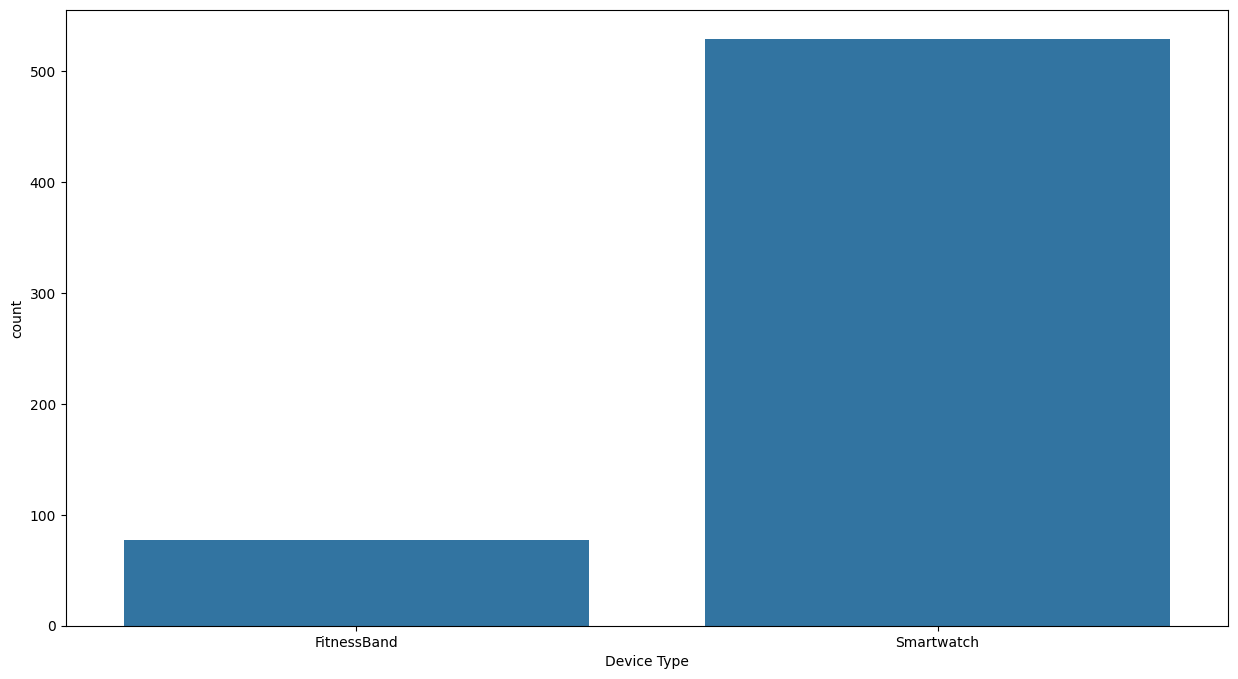

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#Distribution of target variable (price)
sns.histplot(data['Selling Price'])
plt.show()

#Boxplot for each feature
plt.figure(figsize=(15,8))
sns.boxplot(x="Brand Name", y="Selling Price", data=data)

plt.figure(figsize=(15,8))
sns.boxplot(x="Device Type", y="Selling Price", data=data)

plt.figure(figsize=(15,8))
sns.boxplot(x="Display", y="Selling Price", data=data)
#ScatterPlot
plt.figure(figsize=(15,8))
sns.scatterplot(x="Brand Name", y="Original Price", data=data)
#CountPlot

plt.figure(figsize=(15,8))
sns.countplot(x="Brand Name", data=data)

plt.figure(figsize=(15,8))
sns.countplot(x="Device Type", data=data)




# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop('Selling Price', axis=1)
y = data['Selling Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [ ]:
import numpy as np

from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

# Model Evaluation

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].apply(LabelEncoder().fit_transform)

# Define features (X) and target (y)
X = data.drop(columns=["Selling Price"])  # Assuming 'Selling Price' is the target
y = data["Selling Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Regressor": SVR(kernel="rbf")
}

# Store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test) * 100  # Convert to percentage
    cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")  # 5-fold cross-validation
    cv_mean = np.mean(cv_scores) * 100  # Convert to percentage

    # Store results
    results[name] = {"Accuracy (%)": round(accuracy, 2), "Cross-Validation (%)": round(cv_mean, 2)}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df



,Accuracy (%),Cross-Validation (%)
Linear Regression,97.48,85.09
Decision Tree,96.37,77.43
Random Forest,97.81,83.49
Gradient Boosting,97.70,81.60
Support Vector Regressor,-1.21,-91.17
